<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
   
</figure>

# Common pitfalls

<br>




This notebook is created for the MAMBA Python course to explain the common pitfalls in using Python.

<div style="text-align: right"> developed by Onno Ebbens </div>

Table of content:<a class="anchor" id="0"></a>
1. [variable names](#1)
    1. [reusing variable names](#11)
    2. [built-in functions](#12)
2. [nested loops and statements](#2)
3. [copy-paste](#4)
4. [answers to exercises](#answers)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

[back to TOC](#0)
## 1. variable names<a class="anchor" id="1"></a>

Naming your variables may sound trivial but is important for the readability of your code. Some naming conventions are written down in PEP-8. 

An example of a widely adopted naming convention is shown below. The convention is that variable and function names should be lowercase, with words separated by underscores as necessary to improve readability.

In [1]:
# according to conventions (PEP-8)
list_of_animals = ['dog', 'cat', 'mouse', 'duck']

# not according to conventions (PEP-8)
ListOfAnimals = ['dog','cat','mouse','duck']

### A. reusing variable names<a class="anchor" id="11"></a>

#### Exercise 1


#### answer

### B. built-in functions<a class="anchor" id="12"></a>

There are a number of built-in functions that are available without importing them via a package. These functions can be shown with the command below.

In [10]:
dir(__builtin__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

If you use a built-in function as a variable name, you overwrite the built-in function and cannot use it anymore. You have to restart the kernel  <button class='btn btn-default btn-xs'><i class='fa fa-repeat icon-repeat'></i></button> in order to retrieve the built-in function. See the two examples below.

Note: after you understood the examples and did the exercise it may be helpful to comment out the cells below. Otherwise you constantly have to restart the kernel if you accidentally run these cells. You can comment out a cell by selecting its code and press `[ctrl][/]`.

In [11]:
# example 1
range = (1,100) #this overwrites the built-in function 'range'
range(10)       #now you cannot call this function anymore

TypeError: 'tuple' object is not callable

In [12]:
# example 2
list = [1,2,3] #this overwrites the built-in function 'list'
a = (5,4,7)    #if you want to convert this tuple to a list you get an error
list(a)

TypeError: 'list' object is not callable

#### Exercise 2
You have an integer, a float and a list. You want to divide the integer by the float and use the remainder as an index for the list. The code below gives a TypeError. Try to find out what causes the error and change the code to avoid it.

In [13]:
int   = 2
float = 2.0
a_list = [1, 2, 3, 4]

index_a = int/float

print(a[int(index_a)])

TypeError: 'int' object is not callable

#### answer

[back to TOC](#0)

## 2. loops<a class="anchor" id="2"></a>

loops are a very powerful tool but can make code slow and hard to read. The common approach is to avoid loops, especially nested loops, if possible. 

### A. avoid loops with pandas<a class="anchor" id="21"></a>

The example below is about a pandas DataFrame with data from a whatsapp conversation. Every row has a datetime, user and message (the text is ommited because of privacy issues).

In [2]:
df = pd.read_csv(r'..\..\..\..\Practical_examples\whatsapp data\data\_chat_df.csv')
df['datetime'] = pd.to_datetime(df['Unnamed: 0'])
del df['Unnamed: 0']
df.head()

NameError: name 'pd' is not defined

Let's say you want to get a new column with the hour of the day of each row. You could use a for-loop to loop over every row and get the hour of the day from the datetime column. See the example below. This will take some time. Using the `%%time` command you can see how much time.

In [40]:
%%time
df['hour'] = 0
for row_no, row in df.iterrows():
    df.loc[row_no]['hour'] = row['datetime'].hour
print(df.head())

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


    user  message            datetime  hour
0  user1        1 2018-03-22 12:18:07     0
1  user1        1 2018-03-22 12:18:19     0
2  user2        1 2018-03-22 14:39:57     0
3  user2        1 2018-03-22 14:40:03     0
4  user1        1 2018-03-22 14:45:13     0
Wall time: 1min 29s


There is an alternative for the for-loop, this is in general referred to as a vectorized solution. The operation is not executed row-by-row but on the whole vector (column) at once. The example below shows a vectorized solution.

In [38]:
df['hour'] = df['datetime'].dt.hour
df.head()

,user,message,datetime,hour
0,user1,1,2018-03-22 12:18:07,12
1,user1,1,2018-03-22 12:18:19,12
2,user2,1,2018-03-22 14:39:57,14
3,user2,1,2018-03-22 14:40:03,14
4,user1,1,2018-03-22 14:45:13,14


#### exercise 3

Create a new colum 'user_int' that only contains the number of the user as an integer. You can check the dtype of the column with `df['user_int'].dtype`.

#### answer

### B. avoid nested for loops<a class="anchor" id="22"></a>

Consider the code below in which an image of a ship is blurred by taking the average gray value of a 10x10 pixel patch.

source: https://realpython.com/numpy-array-programming/

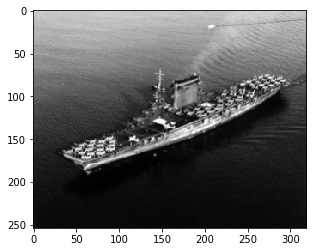

In [27]:
from skimage import io
url = ('https://www.history.navy.mil/bin/imageDownload?image=/'
        'content/dam/nhhc/our-collections/photography/images/'
        '80-G-410000/80-G-416362&rendition=cq5dam.thumbnail.319.319.png')
img = io.imread(url, as_grey=True)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

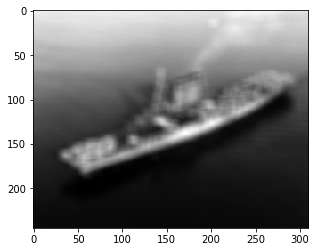

In [6]:
# using a nested for loop
m, n = img.shape
mm, nn = m - size + 1, n - size + 1

patch_means = np.empty((mm, nn))
for i in range(mm):
    for j in range(nn):
        patch_means[i, j] = img[i: i+size, j: j+size].mean()

fig, ax = plt.subplots()
ax.imshow(patch_means, cmap='gray')
ax.grid(False)

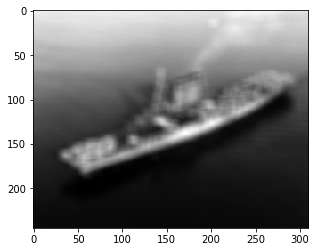

In [26]:
shape = (img.shape[0] - size + 1, img.shape[1] - size + 1, size, size)
patches = stride_tricks.as_strided(img, shape=shape, strides=img.strides*2)
veclen = 10**2
patches.reshape(*patches.shape[:2], veclen).mean(axis=-1).shape
strided_means = patches.mean(axis=(-1, -2))

fig, ax = plt.subplots()
ax.imshow(strided_means, cmap='gray')
ax.grid(False)

#### Exercise 4

Below you see some code to calculate the sum of the rows and the columns of a numpy array. The code contains a nested for loop. Find a way to calculate the sum of the rows and columns without using a nested for-loop.

Bonus: find a way to calculate the sum of the rows and columns without using a for-loop at all.

In [59]:
rand_arr = np.random.random(size=(3,4))
rand_arr

array([[0.12823326, 0.52892857, 0.89942052, 0.89823687],
       [0.92799713, 0.66023133, 0.97904418, 0.73897991],
       [0.55538552, 0.29760157, 0.99367128, 0.70760256]])

In [60]:
row_sum_list = []
col_sum_list = []
for i in range(len(rand_arr)):
    row_sum = 0
    for j in range(len(rand_arr[i])):
        row_sum += rand_arr[i][j]
        if i==0:
            col_sum_list.append(np.sum(rand_arr[:,j]))
    row_sum_list.append(row_sum)

print('sum of rows',row_sum_list)
print('sum of columns',col_sum_list)

sum of rows [2.454819218324551, 3.306252551381297, 2.554260934081754]
sum of columns [1.6116159156450542, 1.4867614717855722, 2.8721359857779, 2.3448193305790754]


#### answer

[back to TOC](#0)

## 3. copy-paste <a class="anchor" id="3"></a>

copy and paste is both a blessing and a curse for programming. It may look obvious to copy-paste a piece of code if you need it again. However this may turn out to be very time consuming in the end.

In [19]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

TypeError: 'tuple' object is not callable

#### Exercise 5


#### answer

[back to TOC](#0)

## 4. answers to exercises <a class="anchor" id="answers"></a>

#### answer to exercise 1

#### answer to exercise 2
You need to rename the variables int and float to avoid overriding the built-in functions `int()` and `float()`.

Note: if you used `int` as a variable name you need to restart the kernel <button class='btn btn-default btn-xs'><i class='fa fa-repeat icon-repeat'></i></button> to be able to use the `int()` built-in function.

In [3]:
no_int   = 2
no_float = 2.0
a_list   = ['item 0','item 1', 'item 2', 'item 3']

index_a = no_int/no_float

print(a_list[int(index_a)])

item 1


#### answer to exercise 3

In [1]:
df['user_int'] = df.user.str[-1].astype('int')
df.head()

NameError: name 'df' is not defined

#### answer to exercise 4

In [ ]:
# answer 1 without nested for-loops
row_sum_list = []
for i in range(len(rand_arr)):
    row_sum_list.append(np.sum(rand_arr[i,:]))
    
col_sum_list = []    
for j in range(len(rand_arr[0])):
    col_sum_list.append(np.sum(rand_arr[:,j]))
    
print('sum of rows',row_sum_list)
print('sum of columns',col_sum_list)

In [56]:
# answer 2 without for-loops
print('sum of rows', rand_arr.sum(axis=1))
print('sum of columns', rand_arr.sum(axis=0))

sum of rows [2.75791528 3.17131696 1.90767824]
sum of columns [2.09294412 2.24096961 2.0862298  1.41676694]


In [58]:
# answer 3 without for-loops
print('sum of rows', np.sum(rand_arr, axis=1))
print('sum of columns', np.sum(rand_arr, axis=0))

sum of rows [2.75791528 3.17131696 1.90767824]
sum of columns [2.09294412 2.24096961 2.0862298  1.41676694]


#### answer to exercise 5